# Inference SDK

The InferenceHTTPClient enables you to interact with Inference over HTTP.

### Install External Dependancies

In this example, we'll use [Supervision](https://github.com/roboflow/supervision) to annotate an image with our inference results.

In [1]:
!pip install supervision

### Roboflow API Key

To load models with `inference`, you'll need a Roboflow API Key. Find instructions for retrieving your API key [here](https://docs.roboflow.com/api-reference/authentication). The utility function below attempts to load your Roboflow API key from your enviornment. If it isn't found, it then prompts you to input it. To avoid needing to input your API key for each example, you can configure your Roboflow API key in your environment via the variable `ROBOFLOW_API_KEY`.

In [2]:
from utils import get_roboflow_api_key

api_key = get_roboflow_api_key()

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Inference SDK Example

In [11]:
from inference_sdk import InferenceHTTPClient, InferenceConfiguration

image_url = "https://storage.googleapis.com/com-roboflow-marketing/inference/soccer2.jpg"

CLIENT = InferenceHTTPClient(
    api_url="http://localhost:9001",
    api_key=api_key,
)

custom_configuration = InferenceConfiguration(confidence_threshold=0.725)
CLIENT.configure(custom_configuration)

results = CLIENT.infer(image_url, model_id="soccer-players-5fuqs/1")

#### Display Results
Now we can display our results using Supervision. We do this by loading our results in the Supervision Detections API, then creating a bounding box annotator and a label annotator.

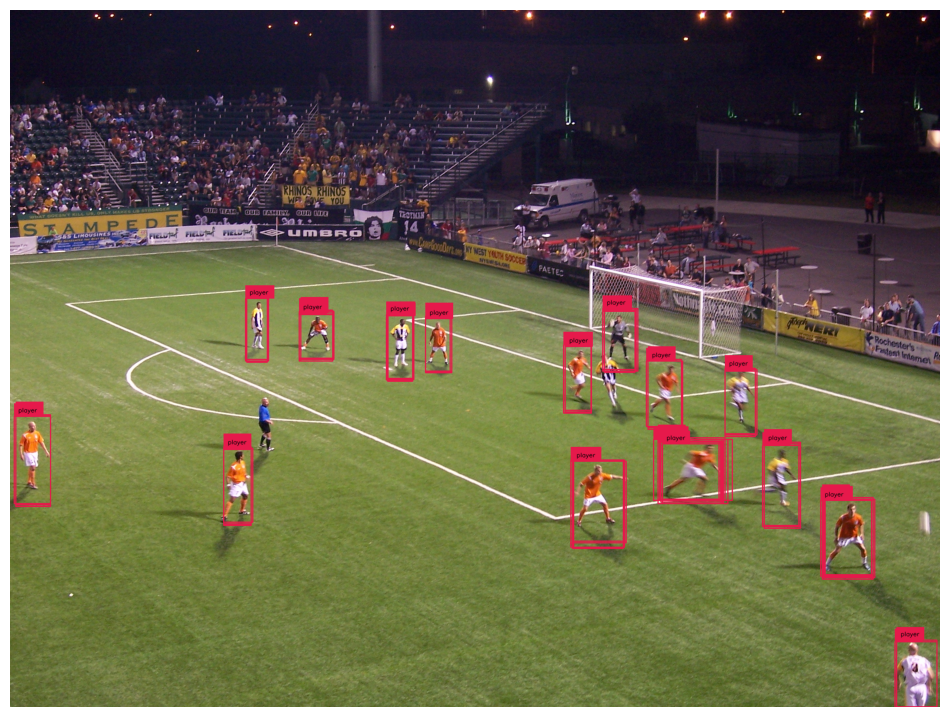

In [13]:
import supervision as sv
from utils import load_image_from_url

#Load detections from Roboflow
detections = sv.Detections.from_inference(results)

#Initialize annotators
bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

#Get class labels from inference results
labels = [r["class"] for r in results["predictions"]]

#Load image from url as numpy array
image = load_image_from_url(image_url)

#Annotate image
annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections, labels=labels)

#Display annotations
sv.plot_image(annotated_image)